In [1]:
pwd()

"/mnt/weird_vol/projects/playaround/Notebooks-Research/Statistics"

In [2]:
DEPOT_PATH

1-element Vector{String}:
 "/mnt/weird_vol/julia/julia-depot"

In [3]:
using Pkg
Pkg.status()

Status `/mnt/weird_vol/projects/playaround/Notebooks-Research/Statistics/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [31c24e10] Distributions v0.25.108
  [91a5bcdd] Plots v1.40.4
  [f3b207a7] StatsPlots v0.15.7


In [5]:
using Distributions
using StatsPlots
using DataFrames

# Poisson general info

Used to:
- Probability of a given number of events occurring in a fixed interval of time
  - These events must occur with a known constant mean rate and independently of the time since the last event
- Number of events in other types of intervals than time and in dimension greater than 1

Characteristics:
- Mean = variance (parameter `lambda`)
- Range: 0 to $\infty$
- The distance between events in a Poisson process is modelled with an `exponential distribution`
  - e.g. the time between events follows an exponential distribution

# Poisson PMF

A poisson PMF is 
$\frac{e^{-\lambda}\lambda^{x}}{x!}$

In [7]:
function pois_pmf(x:: Int, λ:: Number):: Number
    ℯ^(-λ) * λ^(x) / factorial(x)
end

pois_pmf (generic function with 1 method)

## Using the PMF to get the probability of each number of events happening:

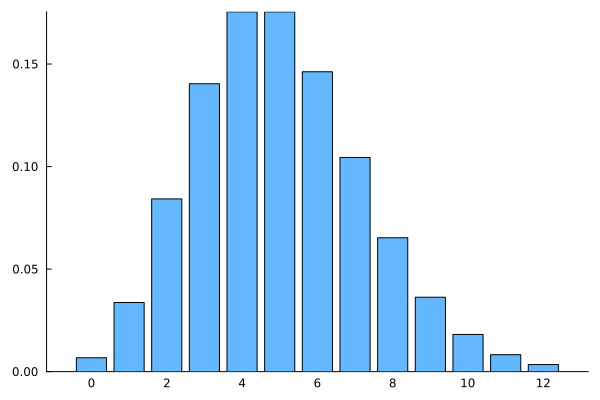

In [4]:
events = [0:12;]
probs = pois_pmf.(events, 5)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

## Using the built-in Poisson function

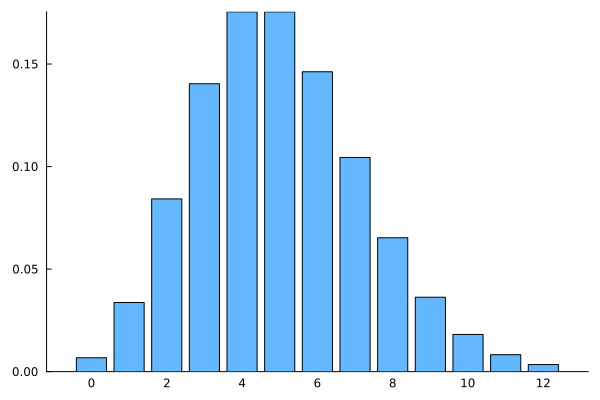

In [44]:
events = [0:12;]
model = Poisson(5)

probs = pdf.(model, events)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

Notes:
- We can see that PMF takes the number events and outputs the probability of that many events happening given the assumed model (here a poisson model)

## Multiple lambdas

In [8]:
lambdas = [1, 3, 5, 10]

probs = [pois_pmf.(events, lambda) for lambda in lambdas]
probs

4-element Vector{Vector{Float64}}:
 [0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-5, 9.123994076672677e-6, 1.0137771196302974e-6, 1.0137771196302975e-7, 9.216155633002704e-9, 7.68012969416892e-10]
 [0.049787068367863944, 0.14936120510359183, 0.22404180765538775, 0.22404180765538775, 0.16803135574154082, 0.10081881344492448, 0.05040940672246225, 0.02160403145248382, 0.008101511794681432, 0.002700503931560477, 0.0008101511794681432, 0.00022095032167312998, 5.5237580418282494e-5]
 [0.006737946999085467, 0.03368973499542734, 0.08422433748856833, 0.14037389581428056, 0.1754673697678507, 0.1754673697678507, 0.1462228081398756, 0.104444862957054, 0.06527803934815875, 0.03626557741564375, 0.01813278870782187, 0.00824217668537358, 0.0034342402855723248]
 [4.5399929762484854e-5, 0.00045399929762484856, 0.0022699964881242427, 0.007566654960414142, 0.018916637401035354, 0.0

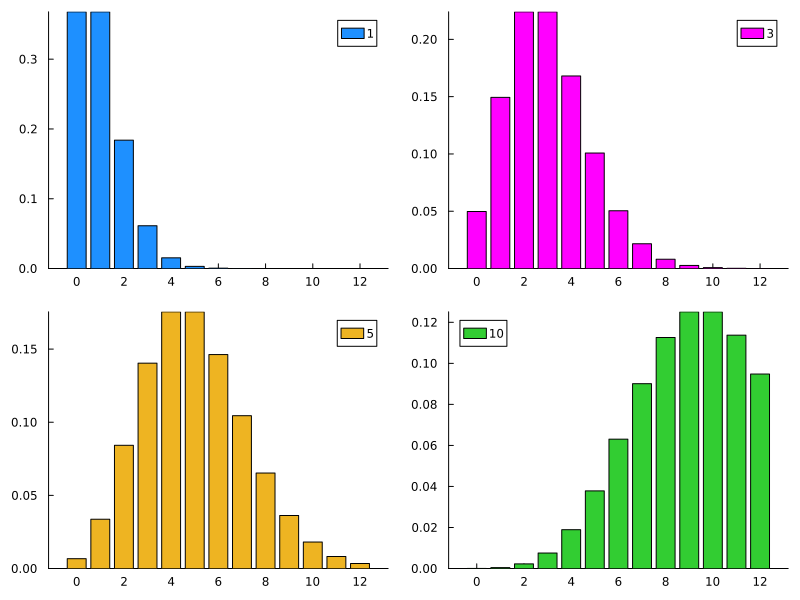

In [10]:
lambdas_mtx = reshape(lambdas, 1, 4)
plot(
    bar(
        events, probs,
        fillcolor=[:dodgerblue :magenta :goldenrod2 :limegreen],
        legend=true,
        grid=false,
        layout=grid(2,2),
        # link=:y,
        label=lambdas_mtx,
        size=(800, 600)
    )
)

Notes:
- Larger lambda makes distribution more symmetric
  - So, when we expect larger number of events, we can also expect a more bell-shaped variance around the mean
  - This is especially, but not only, due to counts/events being >= 0.

# Poisson CDF

A poisson CDF is 
$\frac{e^{-\lambda}\lambda^{x}}{x!}$

In [30]:
function pois_pmf(x::Int, λ::Number)::Number
    ℯ^(-λ) * λ^(x) / factorial(x)
end

function pois_cdf(x::Int, λ::Number)::Number
    x = floor(x)
    x_to_sum = range(0, x)
    pmf_to_sum = [pois_pmf(xᵢ, λ) for xᵢ in x_to_sum]
    sum(pmf_to_sum)
end

function pois_cdf(x::Vector, λ::Number)::Number
    cdfs = []
    for xᵢ in x
        xᵢ = floor(x)
        xᵢ_to_sum = range(0, xᵢ)
        pmf_to_sum = [pois_pmf(xₖ, λ) for xₖ in xᵢ_to_sum]
        cdfs = push!(cdfs, sum(pmf_to_sum))
    end
    cdfs
end

pois_cdf (generic function with 3 methods)

In [31]:
lambdas = [1, 3, 5, 10]

probs = [pois_cdf.(events, lambda) for lambda in lambdas]
probs

4-element Vector{Vector{Float64}}:
 [0.36787944117144233, 0.7357588823428847, 0.9196986029286058, 0.9810118431238463, 0.9963401531726563, 0.9994058151824183, 0.999916758850712, 0.9999897508033253, 0.999998874797402, 0.9999998885745216, 0.9999999899522336, 0.9999999991683892, 0.9999999999364022]
 [0.049787068367863944, 0.19914827347145578, 0.42319008112684353, 0.6472318887822313, 0.8152632445237721, 0.9160820579686966, 0.9664914646911589, 0.9880954961436427, 0.9961970079383241, 0.9988975118698846, 0.9997076630493528, 0.9999286133710259, 0.9999838509514442]
 [0.006737946999085467, 0.040427681994512805, 0.12465201948308113, 0.2650259152973617, 0.4404932850652124, 0.6159606548330632, 0.7621834629729387, 0.8666283259299927, 0.9319063652781515, 0.9681719426937953, 0.9863047314016171, 0.9945469080869906, 0.997981148372563]
 [4.5399929762484854e-5, 0.0004993992273873334, 0.0027693957155115762, 0.010336050675925718, 0.029252688076961072, 0.06708596287903178, 0.13014142088248296, 0.2202206466016

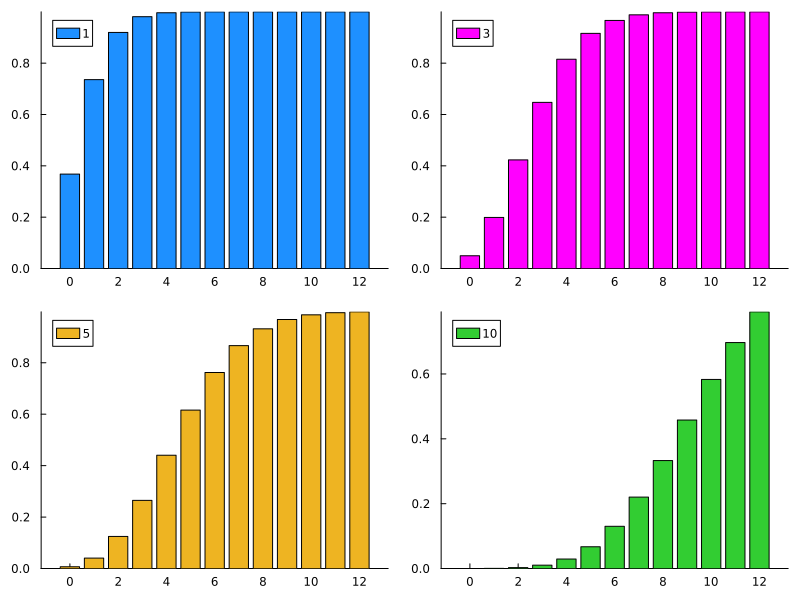

In [32]:
lambdas_mtx = reshape(lambdas, 1, 4)
plot(
    bar(
        events, probs,
        fillcolor=[:dodgerblue :magenta :goldenrod2 :limegreen],
        legend=true,
        grid=false,
        layout=grid(2,2),
        # link=:y,
        label=lambdas_mtx,
        size=(800, 600)
    )
)

# Draw from PMF

Drawing will be done through the Inverse Transform sampling Method.
So we want to find a number x for which FX(x) = U; where X is a 
random variable (Poisson variable in this case) and U is a 
uniform random variable and FX its distribution function 
(Poisson distribution in this case). So this means that to find x
(the goal of this whole function) we need to solve for $x = F^{(-1)}_x(U)$.

So the steps are:
- calculate the inverse of the Poisson CDF: $F^{(-1)}_x$
- draw a uniform random probability U (from the interval [0,1], of course)
- calculate $x = F^{(-1)}_x(U)$

Notes:
- the inverse of a CDF can also be interpreted as its quantile function.
- for for the Poisson distribution, the quantile function is not defined in closed form, so it must be calculated numerically.

In [37]:
function pois_qf(prob::Number, λ::Number)::Number
    """
    The quantile function, also called Percent point function.
    The result of the quantile is the random variable that has probability `p` or less.
    It can be interpreted as the 'cumulative function' for the probabilities and 
    therefore, the inverse of the cumulative distribution of a random variable.
    The quantile function for Poisson is not defined in a closed form, so it must be 
    calculated numerically.
    Here, so far, we use the already implemented form of the ppf.
    """
    model = Poisson(λ)
    quantile(model, prob)
end

function pois_random_sample(λ)
    u = rand()
    pois_qf(u, λ)
end

pois_random_sample (generic function with 1 method)

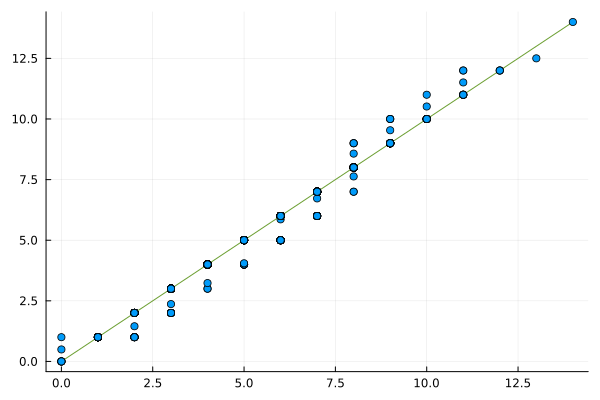

In [41]:
pois_sample = [pois_random_sample(5) for i in range(1, 1000)]

qqplot(Poisson(5), pois_sample)

- The QQ plot shows us that the randomly generated samples follow a Poisson distribution with λ = 5

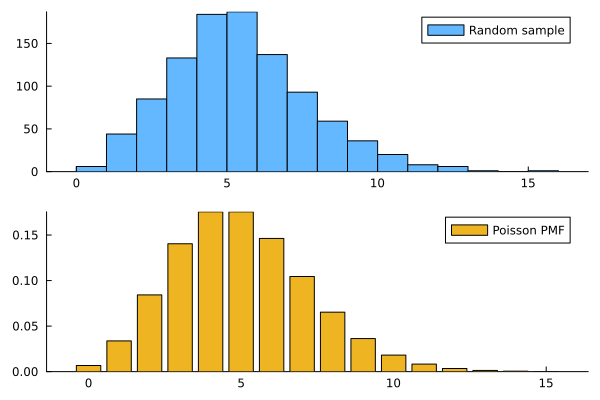

In [66]:
sample_max = maximum(pois_sample)
events = [0:ceil(sample_max);]
probs = pois_pmf.(events, 5)

plot(
    histogram(
        pois_sample,
        bins=20,
        fillcolor=:steelblue1,
        labels="Random sample",
        grid=false
    ),
    bar(
        events,
        probs,
        fillcolor=:goldenrod2,
        labels="Poisson PMF",
        grid=false
    ),
    layout=(2,1)
)

- We can see that the randomly generated samples' histogram also follows what expected from the PMF